# Tarea semanal 4 
## Nicolas Albano 

# Consignas :

Diseñar un filtro pasabajos Chebyshev para obtener una atenuación de 48 dB para frecuencias mayores a 900 Hz, con una atenuación máxima de 0.4 dB desde continua hasta 300 Hz. ( Ancho de Banda reducido para canal Sub Lows

* 1 -  Determinar el orden del filtro y el parámetro ɛ.

* 2 - Obtener la expresion completa de la Transferencia NORMALIZADA de T(s)

* 3  - Obtener el diagrama de polos y ceros y graficar a mano alzada en forma cualitativa la respuesta de modulo y fase. 

* 4  - Sintetizar el circuito NORMALIZADO utilizando estructuras Kerwin–Huelsman–Newcomb (KHN, también conocido como Variable de Estado ) saliendo desde la salida V3 como indica el siguiente circuito de referencia: 
 

 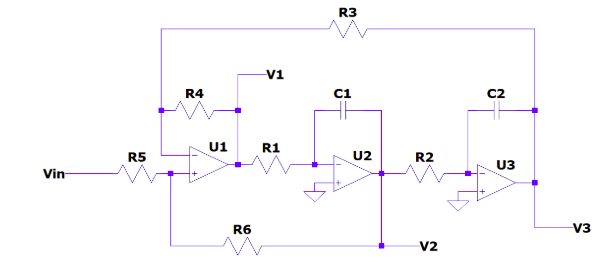

### Punto 1

In [1]:
import numpy as np
import math
from scipy import signal as sig

alfha_max=0.4
alfha_min=48
wp=1
ws=3
# Calculo de epsilon 

epsilon=np.sqrt((10**(alfha_max/10)-1))
display(epsilon)
alfha_aprox=0
n=1
while alfha_aprox < alfha_min:
    alfha_aprox=10*np.log10(1+ epsilon**2 * (np.cosh(n * (np.arccosh(ws))))**2)
    if alfha_aprox<alfha_min :
        n=n+1

display(n)
display(alfha_aprox)

0.3106093948083108

5

60.378833074960205

Obtuvimos entonces un epsilon= 0.3106 y un n=5. Con la ecuacion de recursividad entonces podemos calcular los Cn que siguen la siguiente ecuacion 

Cn(w)=2w*Cn-1(w)-Cn-2(w)

Desarrollo en papel: 


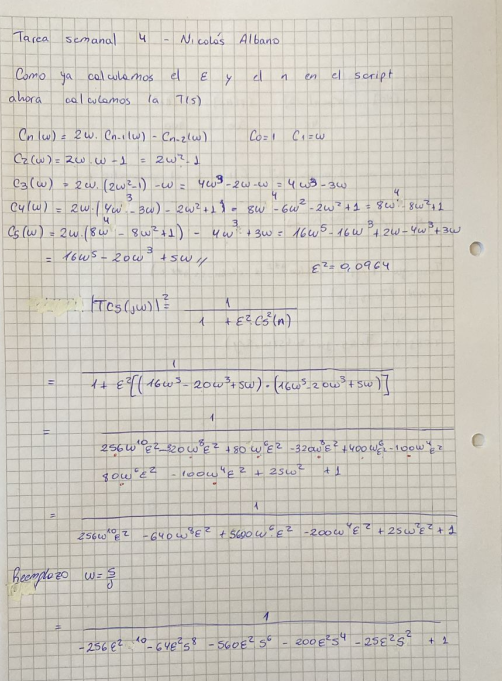


In [2]:
from pytc2.sistemas_lineales import analyze_sys,pretty_print_lti, tf2sos_analog,pretty_print_SOS
from pytc2.general import Chebyshev_polynomials,s,w,print_subtitle
import sympy as sp 
from scipy import signal as sig
from pytc2.sistemas_lineales import bodePlot, pzmap, GroupDelay, analyze_sys

import matplotlib as mpl
from matplotlib import pyplot as plt


chebn_expr= Chebyshev_polynomials(n)
display(chebn_expr)

w*(16*w**4 - 20*w**2 + 5)

In [3]:
Tcsq_jw=1/(1+epsilon**2*chebn_expr**2)
j=sp.I
print(sp.expand(Tcsq_jw))
Tcsq_s=Tcsq_jw.subs(w,s/j)
print(sp.expand(Tcsq_s))


1/(24.6984182126554*w**10 - 61.7460455316385*w**8 + 54.0277898401837*w**6 - 19.295639228637*w**4 + 2.41195490357963*w**2 + 1)
1/(-24.6984182126554*s**10 - 61.7460455316385*s**8 - 54.0277898401837*s**6 - 19.295639228637*s**4 - 2.41195490357963*s**2 + 1)


Analisis en papel de los polos y sus graficos 

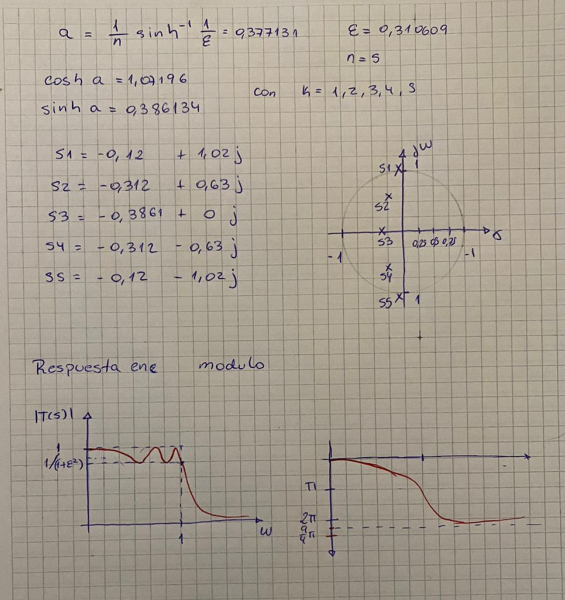


Simulacion numerica:

array([0.20121735])

array([1.        , 1.24955917, 2.03069906, 1.43169213, 0.8208647 ,
       0.20121735])

#### Cheby_ord_5_rip_0.4_att_48

<IPython.core.display.Math object>

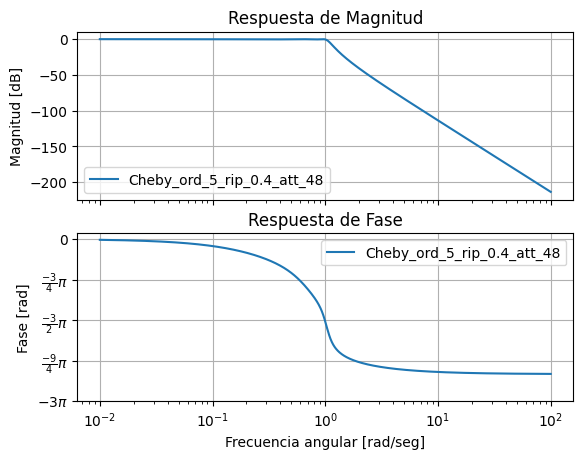

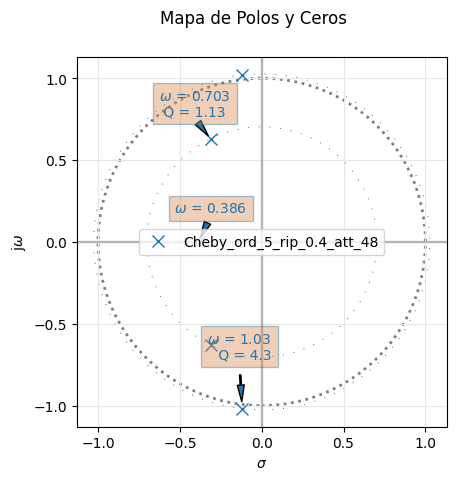

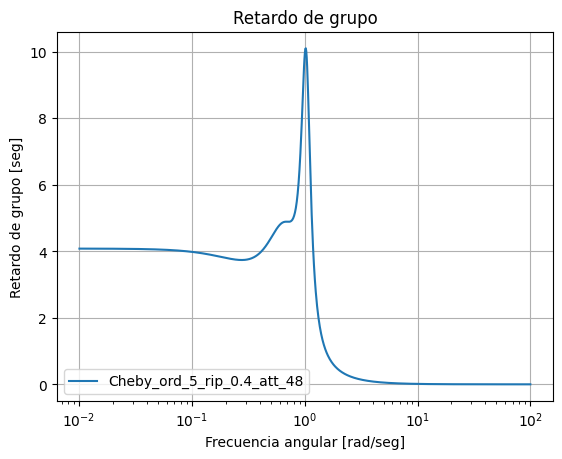

In [4]:
filter_names = []
all_sys=[]

z,p,k=sig.cheb1ap(n,alfha_max)
num_cheb,den_cheb=sig.zpk2tf(z,p,k)

display(num_cheb)
display(den_cheb)

this_aprox= 'Cheby'
this_label=this_aprox + '_ord_' + str(n) + '_rip_' + str(alfha_max) + '_att_' + str(alfha_min)

sos_cheb=tf2sos_analog(num_cheb,den_cheb)

filter_names.append(this_label)
all_sys.append(sig.TransferFunction(num_cheb,den_cheb))

analyze_sys(all_sys,filter_names)

print_subtitle(this_label)
pretty_print_SOS(sos_cheb,mode='omegayq')

Punto 4 

Desarrollo en papel: 

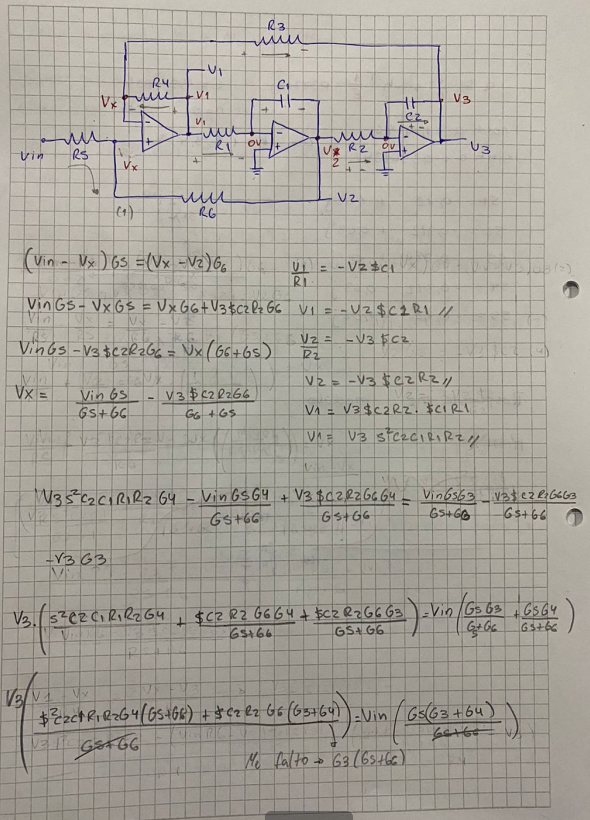

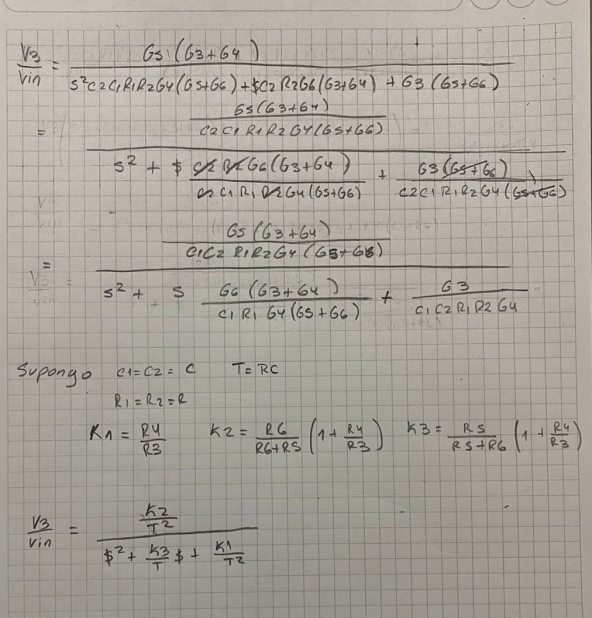


Sintesis del filtro:

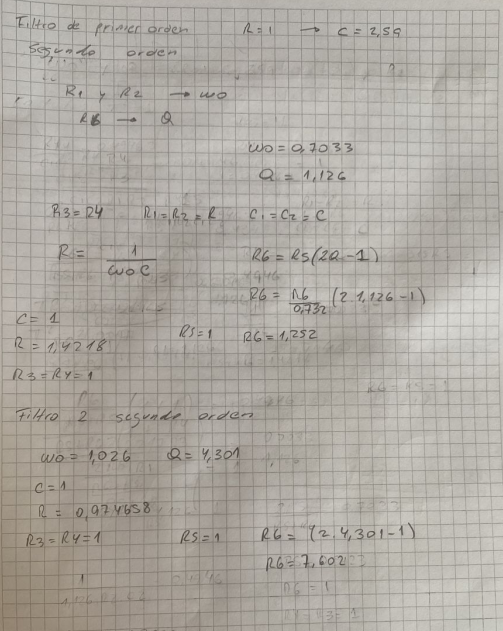


Simulacion circuital: 

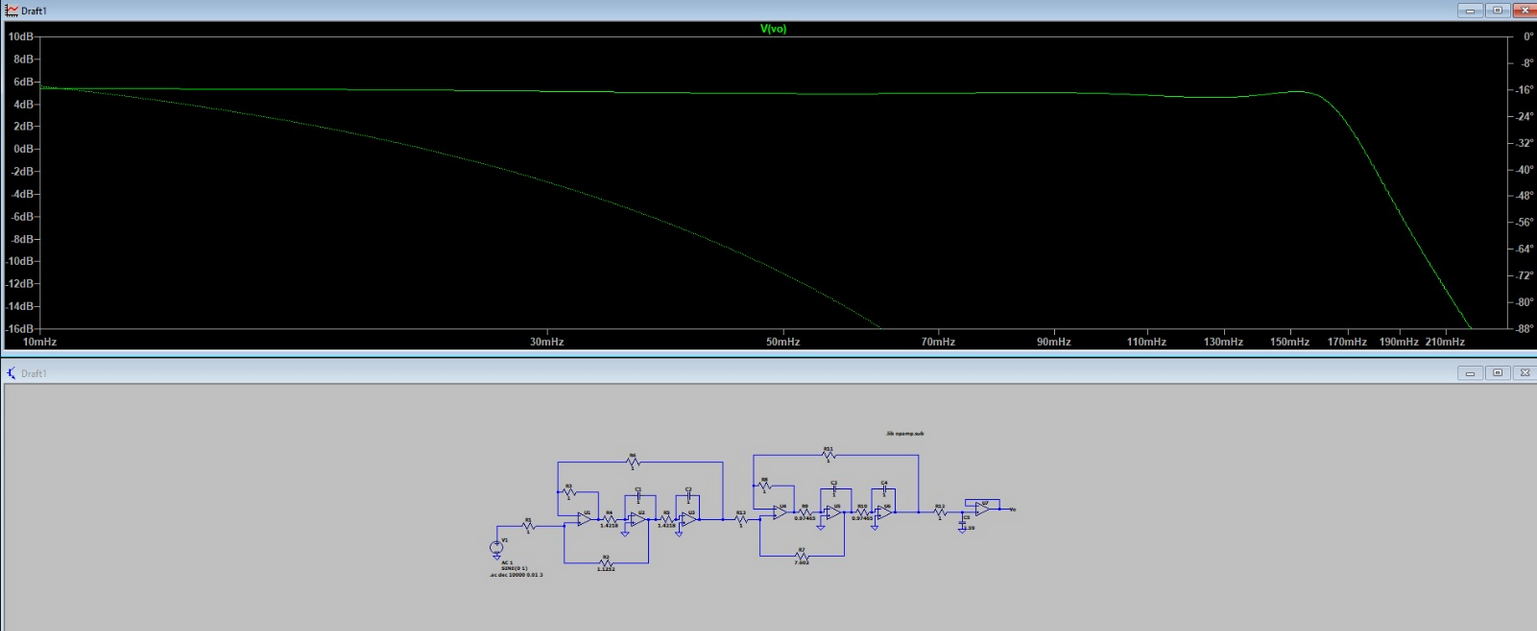


